TRABAJO FINAL: 1RA PARTE.
PROCESAMIENTO DEL SPT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Leemos el archivo desde un excel o csv.

df = pd.read_excel("SPT_example.xlsx", header=1, usecols="B:C")
print(df)

    Prof(m)  N1-60
0         1      4
1         2      4
2         3      8
3         4      5
4         5      9
5         6     15
6         7     12
7         8     15
8         9     13
9        10     23
10       11     28
11       12     29
12       13     26
13       14     24
14       15     23
15       16     24


In [4]:
df['Prof(m)']=-df['Prof(m)']

print(df)

    Prof(m)  N1-60
0        -1      4
1        -2      4
2        -3      8
3        -4      5
4        -5      9
5        -6     15
6        -7     12
7        -8     15
8        -9     13
9       -10     23
10      -11     28
11      -12     29
12      -13     26
13      -14     24
14      -15     23
15      -16     24


CORRELACIÓN ANGULO DE FRICCIÓN Y Cu.

phi(Mayne) = sqrt(20*N60)+20
phi(Peak) = (0.3*N60)+27

In [5]:
# Correlación de ángulo de fricción por Mayne y Peak et al

df['phi(Mayne)'] = np.sqrt(df['N1-60']*20)+20

df['phi(Peak)'] = (df['N1-60']*0.3)+27


#Correlacion para la resistencia no drenada. (Solo aplica a arcillas)
#Se asume un IP de 15, a = 0.068 : Cu= N60 * a * Pa
df['Cu(ForClay)'] = (df['N1-60']*0.068)*101.3

print(df)

    Prof(m)  N1-60  phi(Mayne)  phi(Peak)  Cu(ForClay)
0        -1      4   28.944272       28.2      27.5536
1        -2      4   28.944272       28.2      27.5536
2        -3      8   32.649111       29.4      55.1072
3        -4      5   30.000000       28.5      34.4420
4        -5      9   33.416408       29.7      61.9956
5        -6     15   37.320508       31.5     103.3260
6        -7     12   35.491933       30.6      82.6608
7        -8     15   37.320508       31.5     103.3260
8        -9     13   36.124515       30.9      89.5492
9       -10     23   41.447611       33.9     158.4332
10      -11     28   43.664319       35.4     192.8752
11      -12     29   44.083189       35.7     199.7636
12      -13     26   42.803509       34.8     179.0984
13      -14     24   41.908902       34.2     165.3216
14      -15     23   41.447611       33.9     158.4332
15      -16     24   41.908902       34.2     165.3216


CORRELACIÓN DENSIDAD RELATIVA
Dr = (sqrt(a*N60/60))*20

In [6]:
#1.08 para arenas gruesas, 1 para arenas medias y 0.92 para arenas finas

df['Dr'] = np.sqrt(df['N1-60']*1.08/60)*100


print(df)

    Prof(m)  N1-60  phi(Mayne)  phi(Peak)  Cu(ForClay)         Dr
0        -1      4   28.944272       28.2      27.5536  26.832816
1        -2      4   28.944272       28.2      27.5536  26.832816
2        -3      8   32.649111       29.4      55.1072  37.947332
3        -4      5   30.000000       28.5      34.4420  30.000000
4        -5      9   33.416408       29.7      61.9956  40.249224
5        -6     15   37.320508       31.5     103.3260  51.961524
6        -7     12   35.491933       30.6      82.6608  46.475800
7        -8     15   37.320508       31.5     103.3260  51.961524
8        -9     13   36.124515       30.9      89.5492  48.373546
9       -10     23   41.447611       33.9     158.4332  64.342832
10      -11     28   43.664319       35.4     192.8752  70.992957
11      -12     29   44.083189       35.7     199.7636  72.249567
12      -13     26   42.803509       34.8     179.0984  68.410526
13      -14     24   41.908902       34.2     165.3216  65.726707
14      -1

CORRELACIÓN Módulo de Elasticidad
E = (B*N60)*Pa

In [7]:
#B=10 para arenas limpias NC, 1 para arenas medias y 0.92 para arenas finas
df['E'] = df['N1-60']*10*101.3

print(df)

    Prof(m)  N1-60  phi(Mayne)  phi(Peak)  Cu(ForClay)         Dr        E
0        -1      4   28.944272       28.2      27.5536  26.832816   4052.0
1        -2      4   28.944272       28.2      27.5536  26.832816   4052.0
2        -3      8   32.649111       29.4      55.1072  37.947332   8104.0
3        -4      5   30.000000       28.5      34.4420  30.000000   5065.0
4        -5      9   33.416408       29.7      61.9956  40.249224   9117.0
5        -6     15   37.320508       31.5     103.3260  51.961524  15195.0
6        -7     12   35.491933       30.6      82.6608  46.475800  12156.0
7        -8     15   37.320508       31.5     103.3260  51.961524  15195.0
8        -9     13   36.124515       30.9      89.5492  48.373546  13169.0
9       -10     23   41.447611       33.9     158.4332  64.342832  23299.0
10      -11     28   43.664319       35.4     192.8752  70.992957  28364.0
11      -12     29   44.083189       35.7     199.7636  72.249567  29377.0
12      -13     26   42.8

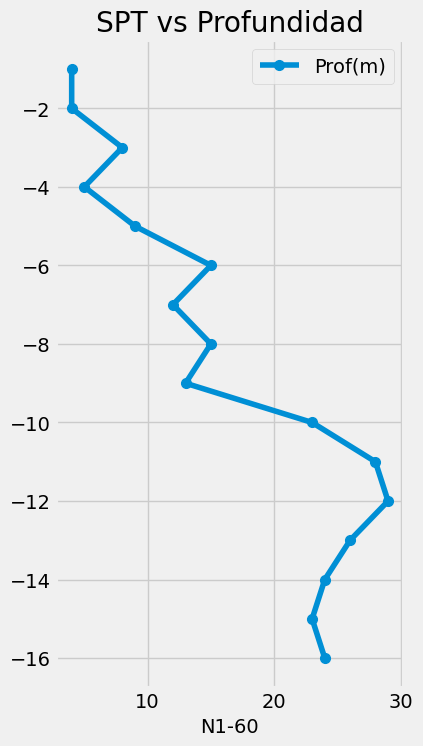

In [8]:
#Reportamos la variación del SPT con la profundidad

#Asignamos el estilo al gráfico
plt.style.use('fivethirtyeight')

df.plot(kind='line', y='Prof(m)', x='N1-60',figsize=[4,8],marker = 'o', markersize=7,title='SPT vs Profundidad')

plt.show()


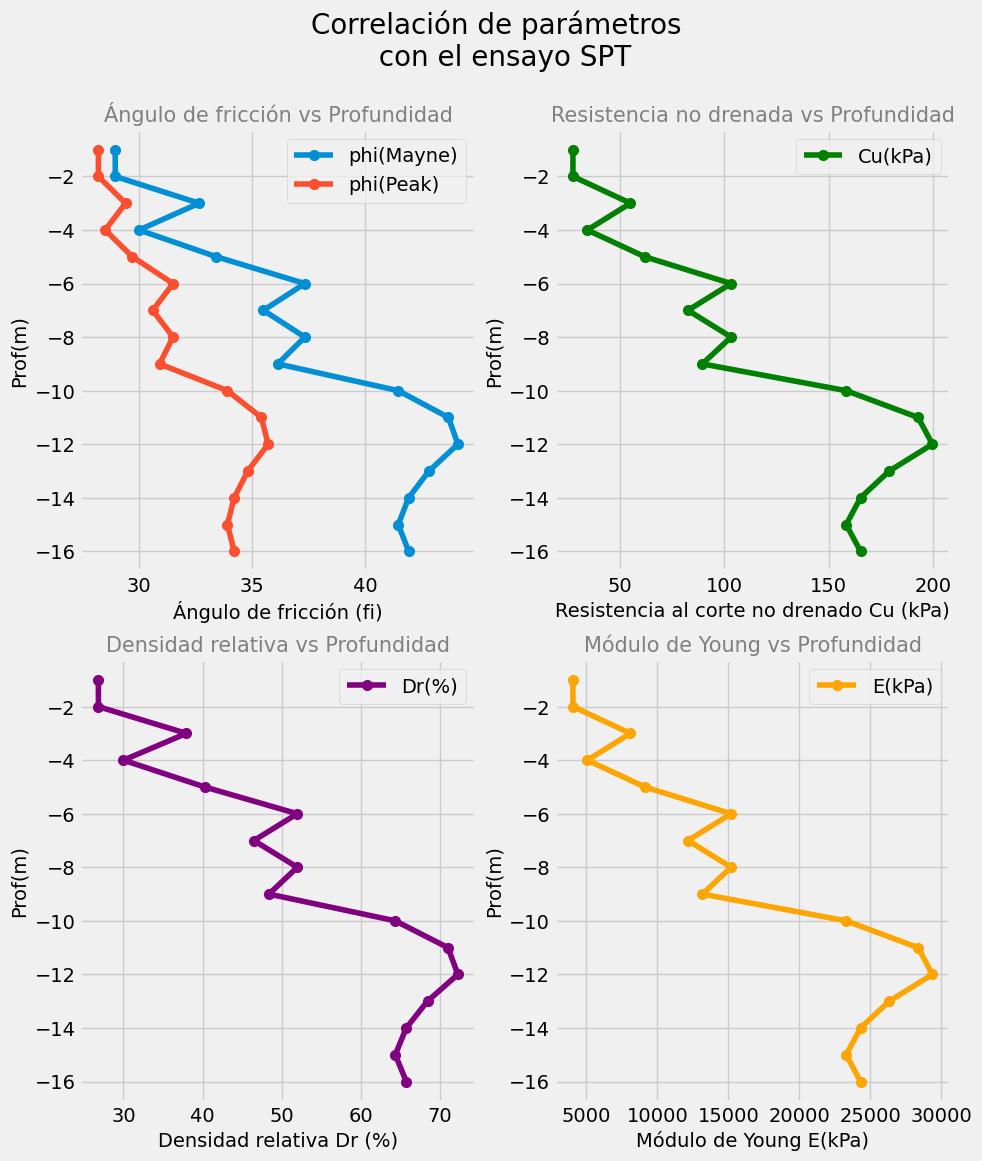

In [9]:
#Reportamos gráficamente los valores de fi, c, Dr y E. Se considera una arena limpia, 
#NOTA: "Cu" solo aplica a arcillas


#Primero realizamos la distribución de los 4 gráficos
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,12)

#Colocamos el título principal
fig.suptitle('Correlación de parámetros \n con el ensayo SPT',size='20')


#Realizamos el PRIMER gráfico y le damos formato a las líneas.
ax[0,0].plot(df['phi(Mayne)'],df['Prof(m)'],label = 'phi(Mayne)',marker = 'o', markersize=7)

ax[0,0].plot(df['phi(Peak)'],df['Prof(m)'],label = 'phi(Peak)',marker = 'o', markersize=7)

ax[0,0].set_xlabel('Ángulo de fricción (fi)')

ax[0,0].set_ylabel('Prof(m)')

#Agregamos la leyenda y el título del gráfico
ax[0,0].legend()
ax[0,0].set_title('Ángulo de fricción vs Profundidad',size='15',color='Gray')


#Realizamos el SEGUNDO gráfico y le damos formato a las líneas. Cu solo aplica a arcillas.
ax[0,1].plot(df['Cu(ForClay)'],df['Prof(m)'],label = 'Cu(kPa)',marker = 'o', markersize=7, color='green')
ax[0,1].set_xlabel('Resistencia al corte no drenado Cu (kPa)')
ax[0,1].set_ylabel('Prof(m)')

#Agregamos la leyenda y el título del gráfico
ax[0,1].legend()
ax[0,1].set_title('Resistencia no drenada vs Profundidad',size='15',color='Gray')



#Realizamos el TERCER gráfico y le damos formato a las líneas.
ax[1,0].plot(df['Dr'],df['Prof(m)'],label = 'Dr(%)',marker = 'o', markersize=7, color='purple')
ax[1,0].set_xlabel('Densidad relativa Dr (%)')
ax[1,0].set_ylabel('Prof(m)')

#Agregamos la leyenda y el título del gráfico
ax[1,0].legend()
ax[1,0].set_title('Densidad relativa vs Profundidad',size='15',color='Gray')


#Realizamos el CUARTO gráfico y le damos formato a las líneas.
ax[1,1].plot(df['E'],df['Prof(m)'],label = 'E(kPa)',marker = 'o', markersize=7, color='orange')
ax[1,1].set_xlabel('Módulo de Young E(kPa)')
ax[1,1].set_ylabel('Prof(m)')

#Agregamos la leyenda y el título del gráfico
ax[1,1].legend()
ax[1,1].set_title('Módulo de Young vs Profundidad',size='15',color='Gray')


plt.show()

